In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

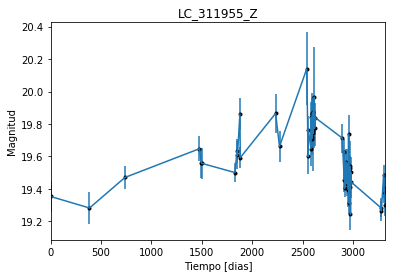

In [2]:
data = np.genfromtxt('LC_311955_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_311955_Z')
plt.savefig("LC_311955_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

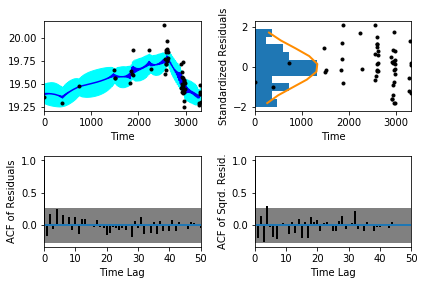

In [5]:
sample.assess_fit()

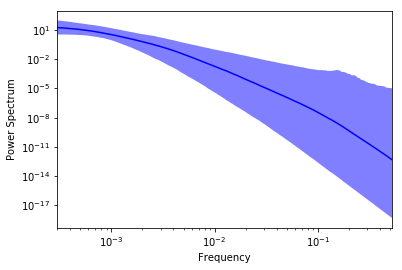

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

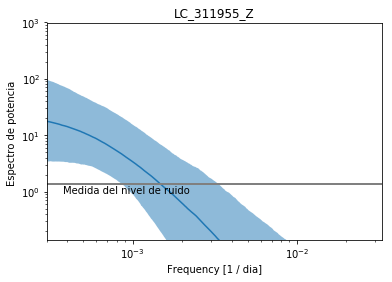

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_311955_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_311955_Z')

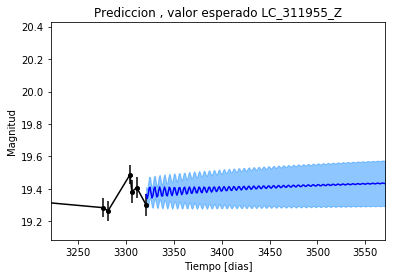

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_311955_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_311955_Z')

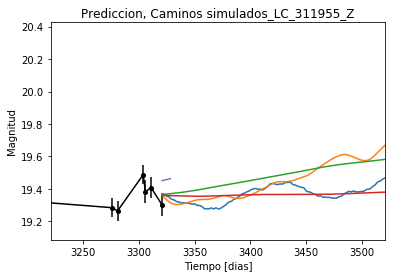

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_311955_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


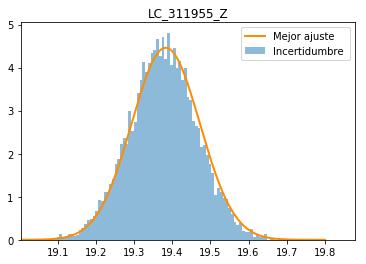

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_311955_Z')
plt.savefig("Mejor_ajuste_LC_311955_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_311955_Z')

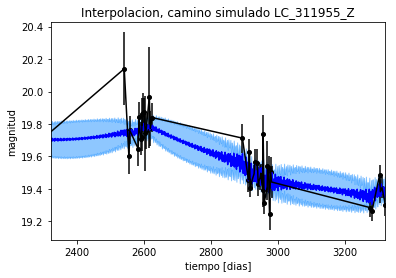

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311955_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_311955_Z')

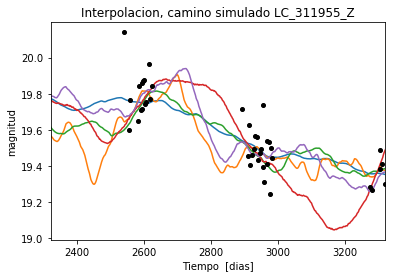

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311955_Z')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 645.879113385
Median: 0.0116806927535
Standard deviation: 0.201818857124
68% credibility interval: [ 0.0009051   0.21432589]
95% credibility interval: [  3.48102707e-04   7.74687107e-01]
99% credibility interval: [  3.08978595e-04   9.77146460e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 370.339383292
Median: 0.00143180194644
Standard deviation: 0.0735290973762
68% credibility interval: [ 0.00042141  0.01726828]
95% credibility interval: [ 0.00031541  0.1846533 ]
99% credibility interval: [  3.03794208e-04   5.42234338e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 665.598604803
Median: 0.0284266851911
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1442.38695153
Median: 57.4701995168
Standard deviation: 1.6405857098
68% credibility interval: [ 55.66358236  58.56758778]
95% credibility interval: [ 53.03195098  59.32619304]
99% credibility interval: [ 50.98744355  60.79083057]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 413.599089627
Median: 0.85599848732
Standard deviation: 2.04415451733
68% credibility interval: [ 0.07847863  3.84048818]
95% credibility interval: [ 0.01494922  6.73011045]
99% credibility interval: [ 0.00948761  9.11129801]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 840.065468411
Median: 0.297004961985
Standard deviation: 7.73909652807
68% credibility interval: [ 0.01228122  5.28571298]
95% credibility interval: [  8.93361764e-04

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 8896.35873244
Median: 2.01892107179e-31
Standard deviation: 1.56206534917e+54
68% credibility interval: [  1.95163429e-52   3.42323302e-06]
95% credibility interval: [  3.44852873e-96   2.55859870e+01]
99% credibility interval: [  1.09202204e-133   7.18134076e+023]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2750.54580233
Median: 19.5147028696
Standard deviation: 0.105441421271
68% credibility interval: [ 19.42241037  19.6032916 ]
95% credibility interval: [ 19.29297414  19.71656048]
99% credibility interval: [ 19.17614542  19.82599047]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 624.599146343
Median: 0.00145291987445
Standard deviation: 0.223687460241
68% credibility interval: [ 0.          0.24131491]
95% credibility interval: [ 0.          0.81867063]
99% credibility interval: [ 0.          0.98869331]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 624.599146343
Median: 0.00145291987445
Standard deviation: 0.223687460241
68% credibility interval: [ 0.          0.24131491]
95% credibility interval: [ 0.          0.81867063]
99% credibility interval: [ 0.          0.98869331]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 962.5684122
Median: 0.0
Standard deviation: 0.00032303991031
68% cre

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1442.38695153
Median: 57.4701995168
Standard deviation: 1.6405857098
68% credibility interval: [ 55.66358236  58.56758778]
95% credibility interval: [ 53.03195098  59.32619304]
99% credibility interval: [ 50.98744355  60.79083057]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2299.48151488
Median: 0.0333672608243
Standard deviation: 0.0406538962524
68% credibility interval: [ 0.01883006  0.06504759]
95% credibility interval: [ 0.01115203  0.14900878]
99% credibility interval: [ 0.00837659  0.25846051]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1323.89838878
Median: 1.17729438555
Standard deviation: 0.184053495009
68% credibility interval: [ 1.01436221  1.37296002]
95% credibility interval: [ 0.88111768  1.60335918]
99% credibility interval: [ 0.8049189   1.78229905]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 438.905760283
Median: 6.5376591632e-05
Standard deviation: 0.160363766996
68% credibility interval: [  1.07784552e-06   4.62516694e-03]
95% credibility interval: [  2.52375914e-08   2.24575029e-01]
99% credibility interval: [  4.35988510e-26   8.93777377e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 645.879113385
Median: (-0.0733919570866+0j)
Standard deviation: 1.89296983735
68% credibility interval: [-1.34664931+0.j         -0.00568693-0.03938759j]
95% credibility interval: [ -4.86750265e+00-4.81995165j  -2.18719381e-03-1.97255451j]
99% credibility interval: [ -6.13959228e+00+0.j          -1.94136977e-03-0.00964165j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 370.339383292
Median: (-0.00899627695266+1.26984300156j)
Standard deviation: 1.47945477555
68% credibility interval: [-0.10849981+1.07935169j -0.00264781+0.j        ]
95% credibility interval: [-1.16021090+5.53298931j -0.00198175+0.j        ]
99% credibility interval: [ -3.40695883e+00+3.89637425j  -1.90879531e-03+0.93673574j]
Posterior summary for par